# Stanford Open Policing Dataset

In this project we will be analysing Police Activity in the state of Rhode Island.

Our data source is the Stanford Open Policing project, collecting data from 31 states in the US.
https://openpolicing.stanford.edu

For our purposes, we will be focussing on a reduced data set with selected data fields; in particular relating to traffic stops in Rhode Island (State) only. Concretely, the data we will be analysing has been saved here:
https://github.com/JasonKwo/DataCamp-Data-Scientist-with-Python/blob/master/11-Analysing-Police-Activity-with-Pandas/police.csv



<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Preparing the data for analysis

### Examining the dataset

Before beginning our analysis, it's important to familiarise ourselves with the dataset. Here, we'll examine the first few rows, and then count the number of missing values.  To start, I like to run `.info()` to get an overview of my data.

In [1]:
# Read 'police.csv' into a DataFrame named ri
import pandas as pd

file_name = 'https://raw.githubusercontent.com/JasonKwo/DataCamp-Data-Scientist-with-Python/master/11-Analysing-Police-Activity-with-Pandas/police.csv'
ri = pd.read_csv(file_name) # ri = pd.read_csv('police.csv')

# Examine the DataFrame
print(ri.info())

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())    # .isnull() returns a dataframe of True and False values for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
state                 91741 non-null object
stop_date             91741 non-null object
stop_time             91741 non-null object
county_name           0 non-null float64
driver_gender         86536 non-null object
driver_race           86539 non-null object
violation_raw         86539 non-null object
violation             86539 non-null object
search_conducted      91741 non-null bool
search_type           3307 non-null object
stop_outcome          86539 non-null object
is_arrested           86539 non-null object
stop_duration         86539 non-null object
drugs_related_stop    91741 non-null bool
district              91741 non-null object
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+ MB
None
  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:1

### Dropping Columns

Often, a DataFrame will contain columns that are not useful to our analysis. Such columns should be dropped from the DataFrame, to make it easier for us to focus on the remaining columns.

Here, we will drop the `county_name` column because it only contains missing values, and we'll drop the `state` column because all of the traffic stops took place in one state (Rhode Island). Thus, these columns can be dropped because they contain no useful information.

In [2]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape) # We now have two fewer columns

(91741, 15)
(91741, 13)


### Dropping rows

When you know that a specific column will be critical to your analysis, and only a small fraction of rows are missing a value in that column, it often makes sense to remove those rows from the dataset.

During this project, the `driver_gender` column will be critical to many of our analyses. Because only a small fraction of rows are missing `driver_gender`, we'll drop those rows from the dataset.  Note how after this we only have one column with non-null values.

In [3]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(86536, 13)


### Data Types

In [4]:
# Examine the data types of your data
print(ri.dtypes)

# search_conducted and is_arrested should be dtype bool.
ri['search_conducted'] = ri.search_conducted.astype('bool')
ri['is_arrested'] = ri.is_arrested.astype('bool')
ri['drugs_related_stop'] = ri.drugs_related_stop.astype('bool')

# Currently, the date and time of each traffic stop are stored in separate object columns: stop_date and stop_time.
# Converting to type datetime will enable convenient date-based attributes that we'll use later in the course.
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame (again)
print(ri.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


The last step that we'll take before starting our analysis is to set the stop_datetime column as the DataFrame's index. By replacing the default index with a DatetimeIndex, we'll make it easier to analyse the dataset by date and time, which will come in handy later.

In [5]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Exploring the relationship between gender and policing

Our main analysis is going to focus on comparing violations commited by each gender.  Before this, we should examine the violations committed by all drivers to get a baseline understanding of the data.

We can count the unique values in the `violation` column, and then separately express those counts as proportions.

In [6]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


### Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

In [7]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


About three-quarters of female traffic stops are for speeding, whereas stops of males are closer to half.  This doesn't mean that females speed more often than males, however, since we didn't take into account the number of stops or drivers.  Note that from here on we will be talking about correlation only, as exploring caustaion requires further expertise.

### Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning.

In [8]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket (citation). Thus, the data fails to indicate that gender has an impact on who gets a ticket for speeding.

### Comparing vehicle search rates by gender

During a police stop, sometime the police search the vehicle.  We can investigate the relationship between gender and car searches.  Running the below we see that the search rate is around 4%.

In [9]:
# Check the data type of 'search_conducted' to confirm it's a Boolean Series
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean.  Note that this only works because the data type is boolean.
print(ri.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


We could now chain `ri.driver_gender == 'F'` and `.search_conducted.mean()` and repeat for males.  Alternatively, we can use `.groupby()` to perform the same calculation for both at once.  The below shows males are searched more than twice as often as females.

In [10]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

We can test this hypothesis by examining the search rate for each combination of gender and violation.  If the hypothesis was true, we would find that males and females are searched at about the same rate for each violation.  In fact we see that for each violation type males are searched at a much higher rate - rejecting our hypothesis.

In [11]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation','driver_gender']).search_conducted.mean())

# I prefer the unstacked view
print(ri.groupby(['violation','driver_gender']).search_conducted.mean().unstack())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64
driver_gender               F         M
violation                              
Equipment            0.039984  0.071496
Moving violation     0.039257  0.061524
Other                0.041018  0.046191
Registration/plates  0.054924  0.108802
Seat belt            0.017301  0.035119
Speeding             0.008309  0.027885


### Comparing frisk rates by gender

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a "protective frisk."

We'll first check to see how many times "Protective Frisk" was the only search type. Then, we'll use a string method to locate all instances in which the driver was frisked.

In [12]:
# Count the 'search_type' values
# .value_counts() excludes missing values by default.  We can use .value_counts(dropna=False) to include these values.
print(ri.search_type.value_counts()) 

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

We see there were 164 instances of Protective Frisk only, but 303 instances of Protective Frisk overall.

Now grouping by gender.

In [13]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


We can see that the frisk rate is higher for males than females.  Reminder, we have not shown that this is caused by gender, only correlated.

# Visual exploratory data analysis

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the arrest rate. In this section, we'll find out whether the arrest rate varies by time of day.

First, we can calculate the arrest rate across all stops. Then, we'll calculate the hourly arrest rate by using the hour attribute of the index. The hour ranges from 0 to 23, in which:

- 0 = midnight  
- 12 = noon  
- 23 = 11 PM

The average arrest rate is around 4%.  We can see an hourly breakdown below.

In [14]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

# Calculate the hourly arrest rate
print(hourly_arrest_rate)

0.0355690117407784
stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


We'll create a line plot from the `hourly_arrest_rate` object. A line plot is appropriate in this case because we're showing how a quantity changes over time.

We see here that the arrest rate has a significant spike overnight, and then dips in the early morning hours.

In [15]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<Figure size 640x480 with 1 Axes>

### Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. In this exercise, you'll assess whether these drug-related stops are becoming more common over time.

The Boolean column `drugs_related_stop` indicates whether drugs were found during a given stop. Let's calculate the annual drug rate by resampling this column, and then use a line plot to visualize how the rate has changed over time.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


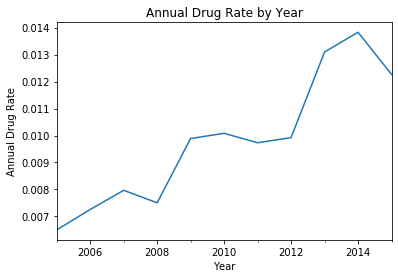

In [16]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()
plt.xlabel('Year')
plt.ylabel('Annual Drug Rate')
plt.title('Annual Drug Rate by Year')

# Display the plot
plt.show()

The graph shows the rate has nearly doubled over 10 years. We might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

We can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

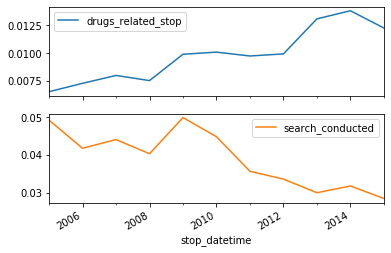

In [17]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

We can see the rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

### Tallying violations by district

The state of Rhode Island is broken into six police districts, also known as zones.

We can create a frequency table to determine how many violations of each type took place in each of the six zones. Then, we'll filter the table to focus on the "K" zones, which we'll examine further.

In [18]:
# Create a frequency table of districts and violations
all_zones = pd.crosstab(ri.district,ri.violation)
print(all_zones)

# Select rows 'Zone K1' through 'Zone K3'
k_zones = all_zones.loc['Zone K1':'Zone K3']
print(k_zones)

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

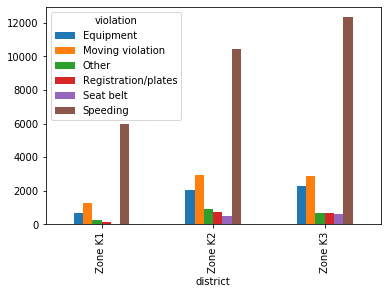

In [19]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

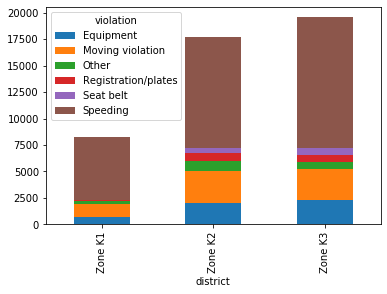

In [20]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

Speeding is by far the largest violation being stopped.  We can also see that zones K2 and K3 have very similar stop profiles.

### Analysing stop duration

In the traffic stops dataset, the stop_duration column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as strings, such as `'0-15 Min'`.

We can make this easier to analyse by converting the stop durations to integers. Because the precise durations are not available, we'll have to estimate the numbers using reasonable values.

In [21]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


We can calculate and visualise the average length of time drivers are stopped for each type of violation. Rather than using the `violation` column in this exercise, we'll use `violation_raw` since it contains more detailed descriptions of the violations.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


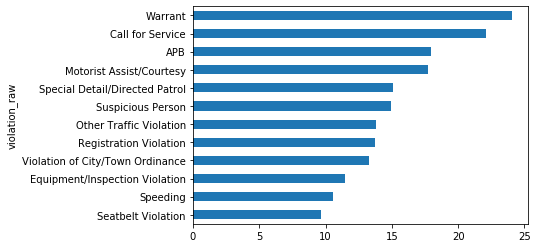

In [22]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

We can pick out some expected items here, such as a seatbelt violation and speeding being relatively short stops, and warrants being a much more serious offense.

# Analysing the effect of weather on policing



We are going to investigate the effect of weather on polcing in Rhode Island.

We can examine the temperature columns from the weather dataset to assess whether the data seems trustworthy. First print the summary statistics, and then visualize the data using a box plot.

When deciding whether the values seem reasonable, keep in mind that the temperature is measured in degrees Fahrenheit, not Celsius!

Our data has 2 wind data columns, 3 temperature columns, and 20 bad weather columns.

For reference:  
- AWND - Average Wind Speed (mph)  
- WSF2 - Fastest Wind Speed over a 2 minute period (mph)

## Exploring the weather dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
STATION    4017 non-null object
DATE       4017 non-null object
TAVG       1217 non-null float64
TMIN       4017 non-null int64
TMAX       4017 non-null int64
AWND       4017 non-null float64
WSF2       4017 non-null float64
WT01       1767 non-null float64
WT02       221 non-null float64
WT03       224 non-null float64
WT04       117 non-null float64
WT05       360 non-null float64
WT06       25 non-null float64
WT07       79 non-null float64
WT08       404 non-null float64
WT09       69 non-null float64
WT10       2 non-null float64
WT11       1 non-null float64
WT13       1175 non-null float64
WT14       575 non-null float64
WT15       6 non-null float64
WT16       1326 non-null float64
WT17       12 non-null float64
WT18       345 non-null float64
WT19       4 non-null float64
WT21       18 non-null float64
WT22       32 non-null float64
dtypes: float64(23), int64(2), object(2

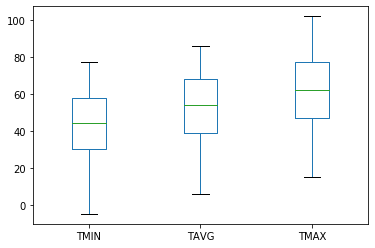

In [23]:
# Read 'weather.csv' into a DataFrame named 'weather'
import pandas as pd
file_name2 = 'https://raw.githubusercontent.com/JasonKwo/DataCamp-Data-Scientist-with-Python/master/11-Analysing-Police-Activity-with-Pandas/weather.csv'
weather = pd.read_csv(file_name2)
weather.info()

# Describe the temperature columns
print(weather[['TMIN','TAVG','TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN','TAVG','TMAX']].plot(kind='box')

# Display the plot
plt.show()

We can add a new column with the difference between the highest and lowest temperatures recorded each day.  Creating a hisogram, we can see that there are no negative values (as expected) and the distribution seems normal and our data appears trustworthy.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


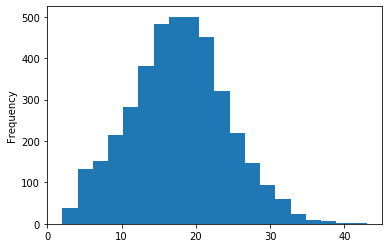

In [24]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist',bins=20)

# Display the plot
plt.show()

## Rating the weather conditions

The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example:

- WT05 indicates "Hail"
- WT11 indicates "High or damaging winds"
- WT17 indicates "Freezing rain"

For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) or NaN (meaning the condition was not present).

Quantify "how bad" the weather was each day by counting the number of 1 values in each row.

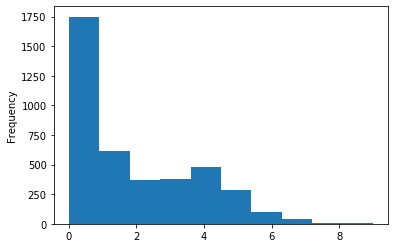

In [25]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1) # axis='columns'

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

After counting the number of bad weather conditions each day, we'll use the counts to create a rating system for the weather.

The counts range from 0 to 9, and should be converted to ratings as follows:

- Convert 0 to 'good'
- Convert 1 through 4 to 'bad'
- Convert 5 through 9 to 'worse'

In [26]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Since the `rating` column only has a few possible values, we'll change its data type to category in order to store the data more efficiently. We'll also specify a logical order for the categories, which will be useful for future analysis.

In [27]:
# Create a list of weather ratings in logical order
cats = ['good','bad','worse']

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype('category',categories=cats,ordered=True)

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


## Merging the weather and police datasets

We want to merge the weather and police datasets for our analysis, with the weather on each date matching the stop records for that date.

One way to do this is to reset the index of `ri` so the DateTime index reverts back to a column which we can then merge on, before setting it back to the index again.


In [28]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(86536, 16)
(86536, 18)


In [29]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each weather 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation','rating']).is_arrested.mean())

0.0355690117407784
rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


This shows that the arrest rate increases as the weather gets worse, and the trend persists across many of the violation types.

In [31]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>